## Tarea 1 - Máquinas de Aprendizaje

### Integrantes: Gabriel Jara, Daniel San Martín

# 1 Regresión Lineal Ordinaria (LSS)

En esta sección trabajaremos con un dataset conocido como *House Sales in King County, USA*, este se encuentra en Kaggle [1] y contiene los precios en el que se vendieron distintas casas en los Estados Unidos entre Mayo del 2014 y Mayo del 2015. Las casas tienen distintas caracterı́sticas que vienen descritas en el dataset, como la cantidad de habitaciones, cantidad de baños, número de pisos, ubicación geográfica, etc. La variable que nos interesará predecir a partir de los demás atributos será el precio de las casas.

(a) Construya un dataframe con los datos a analizar descargando los datos desde la URL adjunta.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/kc_house_data.csv",sep = ",",header = 0)
df = df.drop(['id','date','zipcode'], axis=1)

(b) Describa brevemente el dataset utilizar.

In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Los datos a utilizar consisten en 21,613 observaciones de 18 variables en total. La primera de estas, "price", corresponde a la variable dependiente, precio de las propiedades que se pretende pronosticar a partir de las variables independientes.

(c) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar esta operación.

In [3]:
X = df
y = np.log(df['price'])
mask = np.zeros(len(X))
limit = int(len(X)*0.7)
mask[:limit] = 1
istrain = (mask== 1)
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xtrain = Xtrain.drop(['price'], axis=1)
Xtest = Xtest.drop(['price'], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(Xtrain)
df_scaled_train = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
df_scaled_train.insert(df_scaled_train.shape[1], 'intercept', np.ones(df_scaled_train.shape[0]))

Dado que los datos en las columnas se encuentran en distintas escalas, al momento de aplicar los algoritmos de aprendizaje existirán columnas que ponderarán mucho más y otros muchos menos dada esta diferencia de magnitud. Esta circunstancia perjudica el aprendizaje, puesto que el ajuste de coeficientes se da en magnitudes muy diferentes para cada variable independiente. Es por esta razón que se recomienda a lo menos normalizar la data (ajustar su intervalo), y para algunos modelos de aprendizaje idealmente estandarizar (ajustar la media y la varianza), que es lo que se está haciendo en este caso. 

Es importante mencionar, que el ajuste de la estandarización se realiza sobre los datos del entrenamiento y posteriormente se utilizarán los datos de media y varianza de este conjunto para estandarizar los datos de pruebas.

(d) Realice una regresión lineal de mı́nimos cuadrados básica. Explique los argumentos que se deben entregar a la función que implementa la regresión lineal

In [4]:
import sklearn.linear_model as lm

# Regresion lineal
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(df_scaled_train, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Dado que se utilizaran datos estandarizados, y puesto que el modelo de regresión lineal provisto por ``sklearn`` realiza automáticamente normalización cuando está activo el parámetro ``fit_intercept``, para evitar normalizar datos que han sido previamente estandarizados se ha optado por una vía alternativa de tomar en cuenta el intercepto. De esta forma, al disponer de una columna constante e igual a uno (insertar el vector columna $\vec{1}$ a $\textbf{X}$), esta nueva variable independiente cumplirá la función del intercepto, correspondiente a los $\beta_0$ en la regresión. Por lo anterior, se ingresa el parámetro ``fit_intercept = False``. 

(e) Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Observa algún problema? Si es así, comente y proponga un metodo para eliminar dicho problema.

In [5]:
# Estimador de sigma
def sigmaHat(X, y, yhat):
    M, I = X.shape
    return np.sqrt(1./(M - I - 1) * np.sum((y - yhat)**2))

In [6]:
# Calculo de los Z-score
def Zscore(X, y, yhat, beta):
    V = np.linalg.inv(np.dot(X.T, X))
    v = np.diag(V)
    sigh = sigmaHat(X, y, yhat)
    z = beta/(sigh * np.sqrt(v))
    return z

In [7]:
# Prediccion de los datos de entrenamiento 
yhat_val = linreg.predict(df_scaled_train)

In [8]:
# Valores del Z-score
zs = Zscore(df_scaled_train, ytrain, yhat_val, linreg.coef_)


In [9]:
# Se realiza un contraste de hipotesis para ver si algun \beta_i = 0
from scipy import stats

M, I = df_scaled_train.shape

# Valor critico de z_i ~ t_{M-I-1}
vcrit = stats.t.ppf(1-0.025, M - I - 1)

def test(z,vcr):
    if abs(z) < vcrit:
        return "No Significativo"
    else:
        return "Significativo"
    
cotest = []
for z in zs:
    cotest.append(test(z, vcrit))

In [10]:
cols = [str(i) for i in Xtrain.columns] + ['b0']
df_sp = pd.DataFrame([linreg.coef_, zs, cotest], index=['coef', 'Z-score', 'test'], columns=cols)

df_sp

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,b0
coef,-0.00808553,0.0551112,0.0569348,0.0228725,0.0355051,0.0333657,0.042595,0.0463595,0.184577,0.0459367,0.0322648,-0.104759,0.0152659,0.18788,-0.00403123,0.0844123,-0.0071488,13.0335
Z-score,-3.03408,14.656,7.53058e-07,7.59749,12.2699,14.7857,17.3907,20.5368,48.0682,6.82425e-07,8.58665e-07,-33.7906,6.88979,85.7951,-1.58988,23.5687,-2.34678,6307.52
test,Significativo,Significativo,No Significativo,Significativo,Significativo,Significativo,Significativo,Significativo,Significativo,No Significativo,No Significativo,Significativo,Significativo,Significativo,No Significativo,Significativo,Significativo,Significativo


Al analizar los valores de $Z$-score y realizar los contrastes de hipótesis correspondientes, notamos que hay algunos valores de coeficientes que no son significativos. Esto significa que no se puede rechazar la hipótesis nula según la cual el coeficiente correspondiente sería igual a cero, lo cual se puede dar cuando efectivamente el coeficiente es muy cercano a cero o cuando no siendo el valor β reportado cercano a cero, ocurre que tiene una alta varianza que hace que su valor no pueda ser atribuido a algo distinto que el azar. 

En el caso de los coeficientes analizados se observa que hay cuatro de ellos que resultan no significativos, los cuales podrían no estar aportando información relevante al modelo de regresión. En primera instancia se podría adoptar la decisión de prescindir de estos predictores, sin embargo esto podría ser un error en caso de que se esté en presencia de colinealidad. 

La eventual colinealidad entre atributos supuestamente independientes, afecta negativamente la convergencia del modelo regresivo, generando un comportamiento errático en los coeficientes que hace que hae inválidas las conclusiones respecto a qué atributos están aportando significativamente al modelo. Por lo anterior, antes de tomar la decisión de eliminar atributos, es recomendable analizar la presencia de correlación entre las variables independientes. Se presenta a continuación una matriz de correlaciones. 


In [11]:
df_scaled_train.iloc[:,:-1].corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.535904,0.578053,0.035067,0.210865,-0.003142,0.088809,0.028019,0.365333,0.467729,0.325182,0.170294,0.023393,-0.000963,0.116781,0.383421,0.030806
bathrooms,0.535904,1.000000,0.760464,0.098471,0.503189,0.082557,0.205159,-0.094606,0.657519,0.683966,0.304834,0.485022,0.068625,0.025228,0.225004,0.580070,0.099745
sqft_living,0.578053,0.760464,1.000000,0.178493,0.397948,0.116534,0.295564,-0.048055,0.766096,0.868037,0.457049,0.324213,0.067808,0.061234,0.220904,0.754939,0.188982
sqft_lot,0.035067,0.098471,0.178493,1.000000,0.025827,0.023224,0.072225,-0.019573,0.129979,0.196501,0.007123,0.090992,0.006080,-0.090548,0.224289,0.161865,0.722972
floors,0.210865,0.503189,0.397948,0.025827,1.000000,0.040110,0.060022,-0.220846,0.462251,0.577558,-0.233952,0.417424,0.036750,0.038094,0.162631,0.327623,0.022432
waterfront,-0.003142,0.082557,0.116534,0.023224,0.040110,1.000000,0.391764,0.017628,0.093717,0.086005,0.080403,-0.015090,0.088126,-0.015941,-0.040204,0.093989,0.033634
view,0.088809,0.205159,0.295564,0.072225,0.060022,0.391764,1.000000,0.040835,0.262132,0.180711,0.270965,-0.034804,0.102012,-0.000829,-0.082706,0.289162,0.065560
condition,0.028019,-0.094606,-0.048055,-0.019573,-0.220846,0.017628,0.040835,1.000000,-0.126500,-0.147964,0.168377,-0.316423,-0.075268,-0.020326,-0.110188,-0.087904,-0.018792
grade,0.365333,0.657519,0.766096,0.129979,0.462251,0.093717,0.262132,-0.126500,1.000000,0.762282,0.175869,0.434888,0.026252,0.112334,0.209230,0.736976,0.136042
sqft_above,0.467729,0.683966,0.868037,0.196501,0.577558,0.086005,0.180711,-0.147964,0.762282,1.000000,-0.044872,0.427164,0.037031,0.009976,0.330376,0.730918,0.207778


Del cuadro anterior podemos ver que existen algunas características que tienen altos valores de correlación, por lo que no sería recomendable eliminar atributos previamente declarados no significativos. Se hace necesario por tanto explorar otras técnicas de selección de atributos, lo cual será abordado en la siguiente seccion de la presente tarea, utilizando Ridge y Lasso. 

(f) Estime el error de predicción del modelo usando validación cruzada con un número de "folds" igual a $K = 5$ y $K = 10$. Recuerde que para que la estimación sea razonable debe ajustar los pesos del modelo de nuevo, cada vez que trabaja sobre un determinado "fold". Mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

In [12]:
x_test = pd.DataFrame(scaler.transform(Xtest),columns=Xtest.columns)
x_test.insert(x_test.shape[1], 'intercept', np.ones(x_test.shape[0]))

yhat_test = linreg.predict(x_test)
mse_test = np.mean(np.power(yhat_test - ytest, 2))

from sklearn.model_selection import KFold

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

In [13]:
kf = KFold(n_splits=5)
mse_cv = 0
score = 0

for train, val in kf.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]),
    columns=Xtrain.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept',
        np.ones(df_cross_train.shape[0]))
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(df_cross_train, ym[train])
    df_cross_val = pd.DataFrame(cross_scaler.transform(Xm[val]),columns=Xtrain.columns)
    df_cross_val.insert(df_cross_val.shape[1], 'intercept', np.ones(df_cross_val.shape[0]))
    yhat_val = linreg.predict(df_cross_val)
    y_val = ym[val]
    mse_fold = np.mean(np.power(yhat_val - y_val, 2))
    score_fold = linreg.score(df_cross_val, y_val)
    mse_cv += mse_fold
    score += score_fold

mse_cv = mse_cv / 5
score = score / 5
print "MSE K=5:", mse_cv
print "R2=%f"%score
print ""

MSE K=5: 0.0647092956761
R2=0.766810



In [14]:
kf = KFold(n_splits=10)
mse_cv = 0
score = 0

for train, val in kf.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]),
    columns=Xtrain.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept',
        np.ones(df_cross_train.shape[0]))
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(df_cross_train, ym[train])
    df_cross_val = pd.DataFrame(cross_scaler.transform(Xm[val]),columns=Xtrain.columns)
    df_cross_val.insert(df_cross_val.shape[1], 'intercept', np.ones(df_cross_val.shape[0]))
    yhat_val = linreg.predict(df_cross_val)
    y_val = ym[val]
    mse_fold = np.mean(np.power(yhat_val - y_val, 2))
    score_fold = linreg.score(df_cross_val, y_val)
    mse_cv += mse_fold
    score += score_fold

mse_cv = mse_cv / 10
score = score / 10
print "MSE K=10:", mse_cv
print "R2=%f"%score
print ""

MSE K=10: 0.0646829054256
R2=0.766611



In [15]:
x_test = pd.DataFrame(scaler.transform(Xtest),columns=Xtest.columns)
x_test.insert(x_test.shape[1], 'intercept', np.ones(x_test.shape[0]))


yhat_test = linreg.predict(x_test)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
score = linreg.score(x_test, ytest)

print "Testing MSE: ", mse_test
print "R2=%f "%score
print ""

Testing MSE:  0.0651691603876
R2=0.763561 



Usando validación cruzada fue posible obtiener una estimación adecuada del error real del modelo, en torno a 0.065. También permitió estimar el coeficente $R^2$ que fue de 0.76. 

(j) Mida los errores de predicción para cada dato de entrenamiento. Utilizando un "quantile-quantile plot" determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

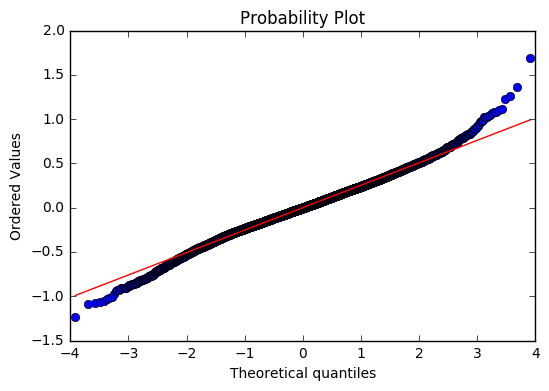

In [16]:
import pylab 
import scipy.stats as stats

# Prediccion datos de entrenamiento
yhat = linreg.predict(df_scaled_train)

# Calculo de error
error = yhat - ytrain

# Grafico
stats.probplot(error, dist="norm", plot=pylab)
pylab.show()

A partir del análisis sobre la gráfica *"quantile-quantile plot"* se observa que, para la mayor parte del dominio de las observaciones, la distribución del valor residual se comporta similar a la distribución normal. Esto no se cumple, sin embargo, para los valores extremos de residuo, siendo el error absoluto mayor al esperado (de acuerdo a la distribución normal) en los casos extremos. 

(h) Se generan dos muestreos de datos donde el valor de sus etiqueta siguen distribuciones distintas: Genere dos modelos, evalue y compare sus comportamientos.

In [17]:
df_A = df.sample(3000)
frames = []
valor = np.log(df.price)

for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,0.5):
    frames.append(df[(valor >= z) & (valor < z+0.5)].head(500))
    
df_B = pd.concat(frames).sample(3000)
X_A = df_A.iloc[:,1:].values
y_A = np.log(df_A.price)
X_B = df_B.iloc[:,1:].values
y_B = np.log(df_B.price)

from sklearn.model_selection import train_test_split
Xtrain_A, Xval_A, ytrain_A, yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B, Xval_B, ytrain_B, yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

Xtrain_A = pd.DataFrame(Xtrain_A)
Xval_A = pd.DataFrame(Xval_A)

scaler = StandardScaler()
df_scaled_train_A = pd.DataFrame(scaler.fit_transform(Xtrain_A), columns=Xtrain_A.columns)
df_scaled_train_A.insert(df_scaled_train_A.shape[1], 'intercept', np.ones(df_scaled_train_A.shape[0]))

df_scaled_test_A = pd.DataFrame(scaler.fit_transform(Xval_A),columns=Xval_A.columns)
df_scaled_test_A.insert(df_scaled_test_A.shape[1], 'intercept', np.ones(df_scaled_test_A.shape[0]))

In [19]:
linregA = lm.LinearRegression(fit_intercept = False)
linregA.fit(df_scaled_train_A, ytrain_A)
yhatA = linreg.predict(df_scaled_test_A)
mseA = np.mean(np.power(yhatA - yval_A, 2))
score = linreg.score(df_scaled_test_A, yval_A)

print "MSE A:", mseA
print "R2=%f "%score
print ""

MSE A: 0.0607015134138
R2=0.758411 



In [20]:
from sklearn.preprocessing import StandardScaler

Xtrain_B = pd.DataFrame(Xtrain_B)
Xval_B = pd.DataFrame(Xval_B)

scaler = StandardScaler()
df_scaled_train_B = pd.DataFrame(scaler.fit_transform(Xtrain_B), columns=Xtrain_B.columns)
df_scaled_train_B.insert(df_scaled_train_B.shape[1], 'intercept', np.ones(df_scaled_train_B.shape[0]))

df_scaled_test_B = pd.DataFrame(scaler.fit_transform(Xval_B),columns=Xval_B.columns)
df_scaled_test_B.insert(df_scaled_test_B.shape[1], 'intercept', np.ones(df_scaled_test_B.shape[0]))

In [21]:
linregB = lm.LinearRegression(fit_intercept = False)
linregB.fit(df_scaled_train_B, ytrain_B)
yhatB = linreg.predict(df_scaled_test_B)
mseB = np.mean(np.power(yhatB - yval_B, 2))
score = linreg.score(df_scaled_test_B, yval_B)

print "MSE B:", mseB
print "R2=%f "%score
print ""

MSE B: 0.210119935441
R2=0.719477 



Se observa que de las dos muestras, la que fue construida aleatoriamente permitió generar un modelo de comportamiento similar al que se habría obtenido con toda la data de entrenamiento. Por otra parte, al forzar un muestreo homogéneamene distribuido sobre el dominio de la variable dependiente se produce un claro deterioro del error real del modelo y del coeficiente $R^2$ medido sobre los datos de prueba. Esto es reflejo de que la nueva muestra no representa realmente el comportamiento de la mayoría de las observaciones, dando lugar a que registros poco frecuentes sean tratados con la misma ponderación que aquellos más comunes. 

---

# 2 Selección de Atributos

Utilizando el dataframe de la actividad anterior,

(a) Construya una función que implemente Forward Step-wise Selection (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo. Ordene el eje $x$ de menor a mayor.

In [22]:
import matplotlib.pyplot as plt

def plot_error(x, error_training, error_testing):
    plt.figure(figsize=(10, 6))
    plt.plot(x, error_training, label="Training Error")
    plt.plot(x, error_testing, label="Testing Error")
    plt.grid(True)
    plt.legend()
    plt.xlabel("N de variables")
    plt.ylabel("MSE")
    plt.show()

In [23]:
def fss(x, y, xt, yt, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    
    # Variables para el grafico
    mse_tr = []
    mse_te = []
    
    while remaining and len(selected)<=k :
        score_candidates = []
        tmp_test = []

        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]            
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            #score_candidates.append((mse_candidate, candidate))
            
            # Testing error
            prediction_test = model.predict(xt[:,indexes])
            residuals_test = prediction_test - yt
            mse_test_candidates = np.mean(np.power(residuals_test, 2))
            score_candidates.append((mse_candidate, candidate, mse_test_candidates))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate, test_score = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
        
        # Guardar errores de training y testing
        mse_tr.append(best_new_score)
        mse_te.append(test_score)
        
    # Grafico de errores
    plot_error(np.arange(1, 1 + len(mse_tr)), mse_tr, mse_te)
    
    return selected

selected = grade ...
totalvars=2, mse = 0.143260
selected = lat-long ...
totalvars=3, mse = 0.103340
selected = sqft_living ...
totalvars=4, mse = 0.084960
selected = yr_built ...
totalvars=5, mse = 0.075447
selected = view ...
totalvars=6, mse = 0.071782
selected = sqft_lot15 ...
totalvars=7, mse = 0.069979
selected = bathrooms ...
totalvars=8, mse = 0.068251
selected = condition ...
totalvars=9, mse = 0.066864
selected = waterfront ...
totalvars=10, mse = 0.065836
selected = floors ...
totalvars=11, mse = 0.065107
selected = sqft_lot ...
totalvars=12, mse = 0.064820
selected = yr_renovated ...
totalvars=13, mse = 0.064619
selected = bedrooms ...
totalvars=14, mse = 0.064583
selected = sqft_above ...
totalvars=15, mse = 0.064554
selected = intercept ...
totalvars=16, mse = 0.064527
selected = sqft_living15 ...
totalvars=17, mse = 0.064516
selected = sqft_basement ...
totalvars=18, mse = 0.064516


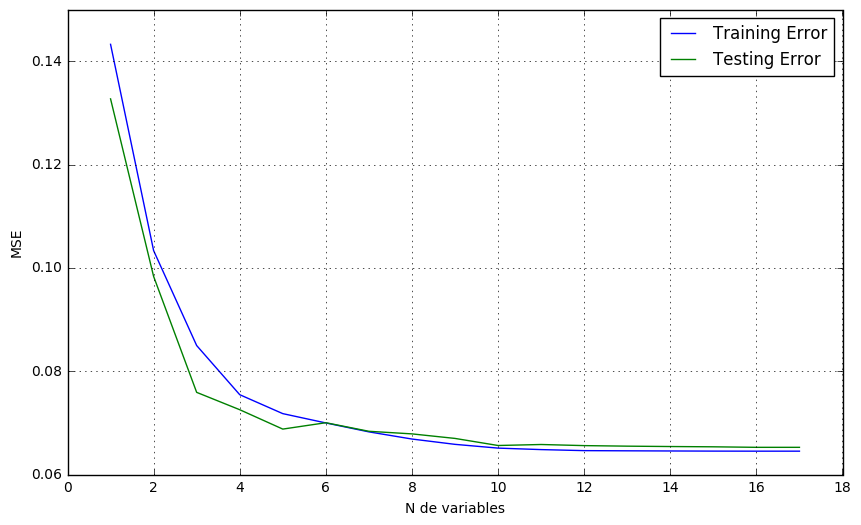

Selected [17, 8, 13, 2, 11, 6, 15, 1, 7, 5, 4, 3, 12, 0, 9, 16, 14, 10]


In [24]:
# Training data
Xm = df_scaled_train.as_matrix()
Ym = ytrain.as_matrix()


# Testing data
Xt = x_test.as_matrix()
yt = ytest.as_matrix()

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",                     
    "condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long", 
    "sqft_living15","sqft_lot15","intercept"]

sel = fss(Xm, Ym, Xt, yt, names_regressors)
print "Selected", sel

Luego de ejecutar el FSS, se obtiene que el mejor modelo es el que posee todas las variables. Aún así, como análisis cualitativo, notamos que desde las 10 variables hacia arriba el error es comparable, por lo que en el caso que no busquemos la centésima de precisión ya obtendríamos un modelo lo suficientemente competente.

Llama la atención que se observe un error de entrenamiento mayor que el error de testeo cuando se entrena con pocos atributos. Es posible que esta situación se deba a un problema de convergencia del modelo, aunque no está clara una explicación. 

Una propuesta podría ser el uso de Kfold cross validation y el ajuste $R^2$ como criterio de selección de modelo/variables.

Numero optimo de features : 18
Scores:  [ -4.29662288e-04   4.74027093e-01   6.45319084e-01   6.93728531e-01
   7.28060065e-01   7.36463080e-01   7.43117174e-01   7.53746990e-01
   7.58712623e-01   7.61709056e-01   7.65012985e-01   7.65001823e-01
   7.65001823e-01   7.66041194e-01   7.66714770e-01   7.66768801e-01
   7.66866172e-01   7.66881692e-01]


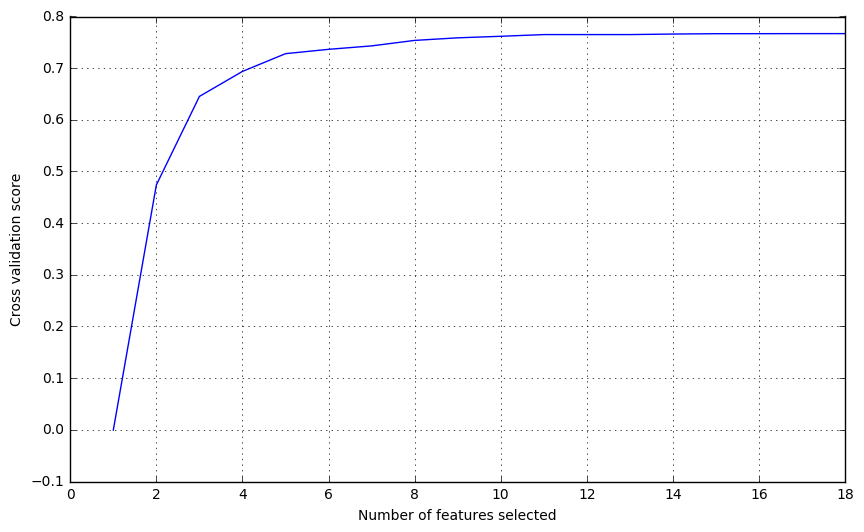

In [25]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Linear regression
linreg = lm.LinearRegression(fit_intercept=False)

# Uso de seleccion de caracteristicas de sklearn
rfecv = RFECV(estimator=linreg, step=1, cv=KFold(5), scoring='r2')
rfecv.fit(Xm, ym)

print("Numero optimo de features : %d" % rfecv.n_features_)
print "Scores: ", rfecv.grid_scores_ # Puntaje de ajuste

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(np.arange(1, 1 + len(rfecv.grid_scores_)), rfecv.grid_scores_)
plt.grid(True)
plt.show()

Con esta propuesta, notamos que el algoritmo indica que con todas las variables el modelo obtiene el mejor rendimiento. Al igual que en el caso anterior, cualitativamente podemos ver que con 10 variables el modelo tiene resultados considerablemente buenos.

---

# 3 Regularización

Utilizando el dataframe de la actividad anterior,

(a) Ajuste un modelo lineal utilizando "Ridge Regression", es decir, regularizando con la norma $\ell_2$. Utilice
valores del parámetro de regularización $\lambda^{‡}$ en el rango $[10^4 , 10^{−1}]$. Construya un gráfico que muestre los
coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. (**Hint**:
Note que la lı́nea 4 y el primer argumento en la lı́nea 12 son crı́ticos).

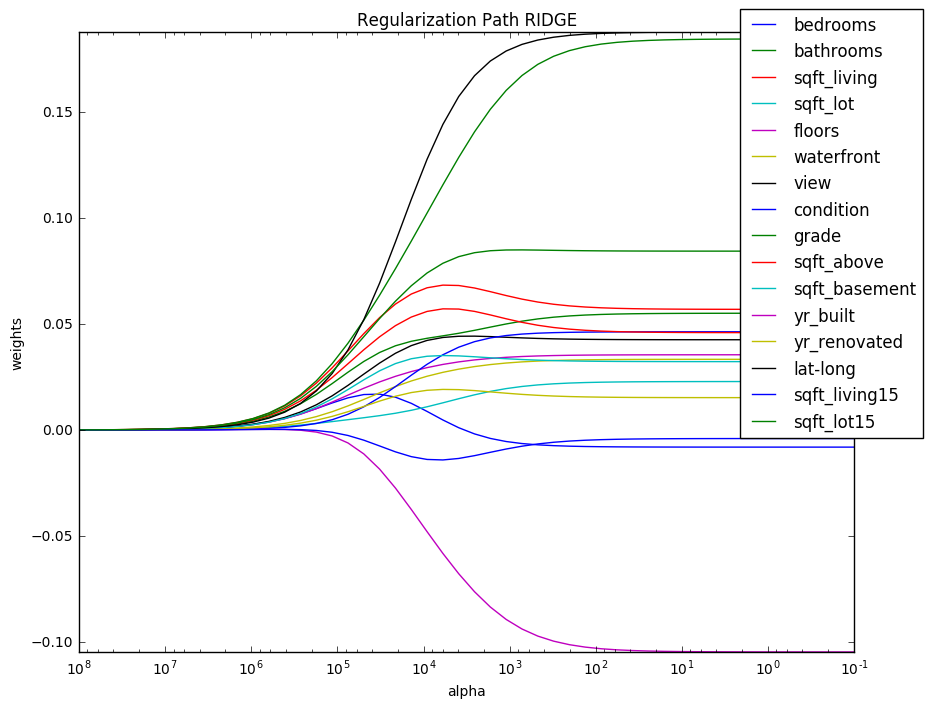

In [26]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt

ax = plt.figure(figsize=(10, 8))

Dtrain = df_scaled_train.copy()
Dtrain = Dtrain.drop('intercept', axis=1)
names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
    "condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
    "sqft_living15","sqft_lot15"]

alphas_ = np.logspace(8,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    coefs.append(model.coef_)
    ax = plt.gca()
    
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print alphas_.shape
    #print y_arr.shape
    plt.plot(alphas_, y_arr, label=label)
    
#plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
#plt.legend(loc=1)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

$^{‡}$ Se asume la siguiente formulación: $\min_w ||\textbf{Y} - \textbf{Xw}||^2 + \lambda ||\textbf{w}||^2$.

Lo que se aprecia en el gráfico, es el efecto de la regularización. Según la teoría a medida que el valor del parámetro $\lambda$ crece, los pesos de los coeficientes deberían comenzar a "*contraerse*", hasta que con un parámetro de regularización suficientemente alto todos los coeficientes convergen a cero. 

(b) Ajuste un modelo lineal utilizando el método "Lasso", es decir, regularizando con la norma $\ell_1$. Utilice valores del parámetro de regularización $\lambda^{§}$ en el rango $[10^1 ,10^{−2}]$. Para obtener el código, modifique las lı́neas 7 y 9 del ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo Lasso para seleccionar atributos?

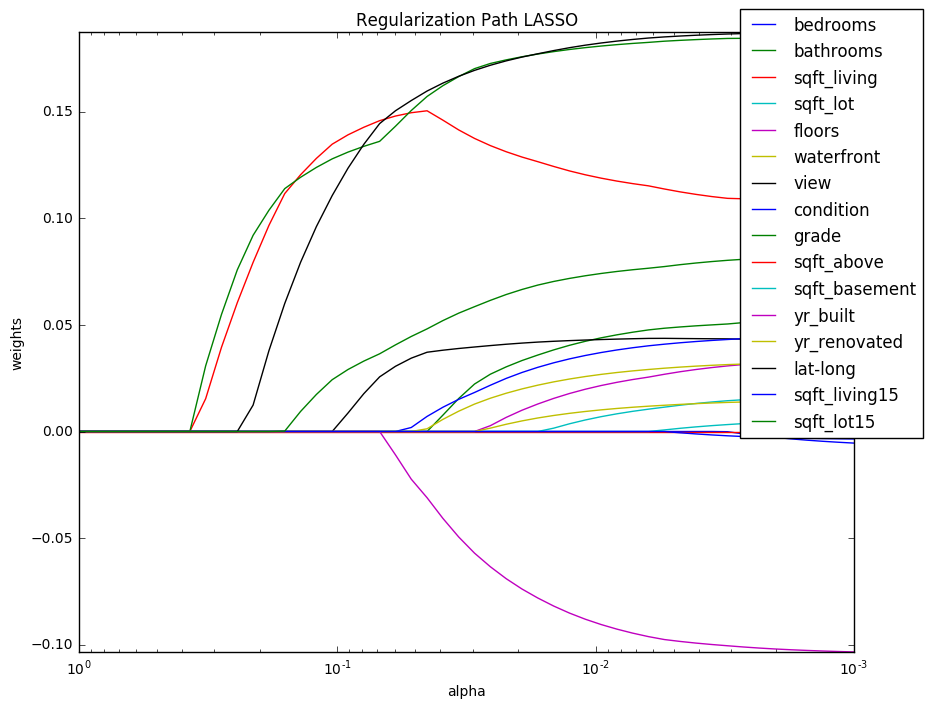

In [27]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt

ax = plt.figure(figsize=(10, 8))

Dtrain = df_scaled_train.copy()
Dtrain = Dtrain.drop('intercept', axis=1)
names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
    "condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
    "sqft_living15","sqft_lot15"]

alphas_ = np.logspace(0,-3,base=10)
coefs = []
clf = Lasso(fit_intercept=True)

for a in alphas_:
    clf.set_params(alpha=a)
    clf.fit(Dtrain, ytrain)
    coefs.append(clf.coef_)
    ax = plt.gca()
    
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print alphas_.shape
    #print y_arr.shape
    plt.plot(alphas_, y_arr, label=label)
    
#plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path LASSO')
plt.axis('tight')
#plt.legend(loc=1)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

$^{§}$ Se asume la siguiente formulación: $\min_w \frac12 ||\textbf{Y} - \textbf{Xw}||^2 + \lambda ||\textbf{w}||_{\ell_1}$.

Al igual que en el ejercicio anterior, lo que vemos en el gráfico es el efecto de la regularización para distintos valores de $\lambda$. La ventaja de usar Lasso es que genera modelos más pequeños dado que reduce el tamaño de atributos, facilitando la intepretación del modelo. Lasso además de "*encoger*" los pesos realiza una selección de atributos automáticas, puesto que no todos los coeficientes se hacen cero para un mismo parámetro de regularización, sino que se van desactivando secuencialmente, según su grado de significancia respecto a la variable dependiente. 

(c) Utilizando "Ridge Regression", construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del parámetro de regularización. Discuta lo que observa.

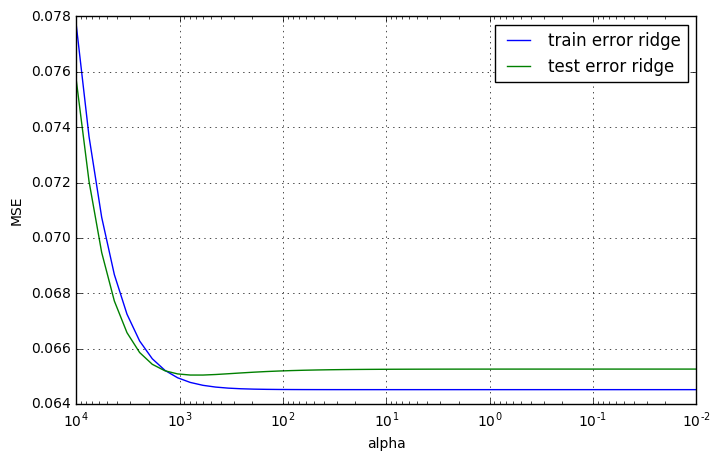

In [28]:
Xtest = x_test.copy()
ytest = ytest.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(4,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
    
ax = plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend()
plt.grid(True)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

Gráficamente notamos el efecto de la regularización sobre los errores de entrenamiento y pruebas. Esta herramienta nos ayudaría a crear modelos que puedan generalizar de mejor forma al permitir agregar este parámetro, ya que podemos "penalizar" los resultados de entrenamiento.

Nuevamente se observa que el error de entrenamiento puede ser mayor que el de testeo, en este caso cuando el parámetro λ es alto, lo cual se podría atribuir a que se ha acotado demasiado los parámetros beta por lo que el atributo que predomina es el intercepto (que no está acotado). Es posible que la muestra de testeo responda a un intercepto levemente menor, que la de training, genrando el efecto que se observa. 

(d) Utilizando "Lasso", construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del parámetro de regularización. Discuta lo que observa.

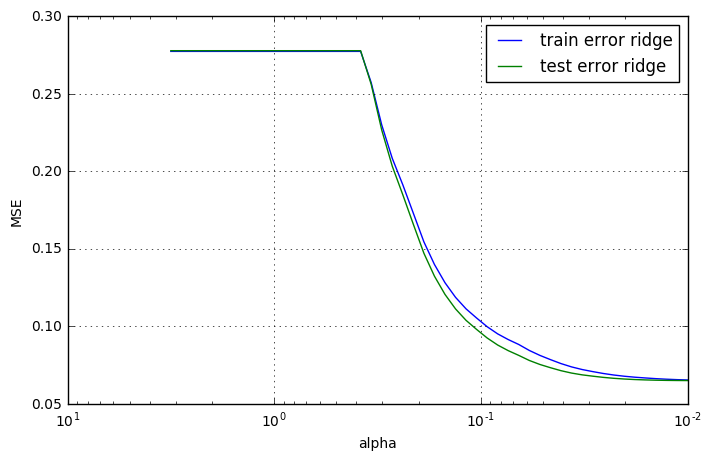

In [29]:
Xtest = x_test.copy()
ytest = ytest.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(0.5,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
    
ax = plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend()
plt.grid(True)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

Se aprecia que con $\lambda$ suficientemente alto el error de training y de testing se equiparan en un máximo, lo cual responde a que a partir de ese punto todos los coeficientes se hacen cero. Esta ves el error de testeo es consistentemente más bajo que el de entrenamiento, como era esperable. 

(e) Estime el valor del parámetro de regularización en los métodos anteriores usando validación cruzada.

In [30]:
from sklearn.linear_model import Lasso

MSE = lambda y,yhat: np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

from sklearn import cross_validation

k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
mse_list_k10 = []

for a in alphas_:
    model.set_params(alpha=a)
    for train,vald in k_fold:
        cross_scaler = StandardScaler().fit(Xm[train])
        df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=Xtrain.columns)
        df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
        df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[vald]), columns=Xtrain.columns)
        df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
        mse_list_k10.append(MSE(model.fit(df_cross_train, ym[train]).predict(df_cross_test),ym[vald]))
        
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

/home/gabo/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


BEST PARAMETER=3.162278, MSE(CV)=0.277498
BEST PARAMETER=1.976598, MSE(CV)=0.277498
BEST PARAMETER=0.339322, MSE(CV)=0.276496
BEST PARAMETER=0.301711, MSE(CV)=0.274288
BEST PARAMETER=0.268270, MSE(CV)=0.271299
BEST PARAMETER=0.238534, MSE(CV)=0.267827
BEST PARAMETER=0.212095, MSE(CV)=0.263880
BEST PARAMETER=0.188586, MSE(CV)=0.259511
BEST PARAMETER=0.167683, MSE(CV)=0.254916
BEST PARAMETER=0.149097, MSE(CV)=0.250227
BEST PARAMETER=0.132571, MSE(CV)=0.245535
BEST PARAMETER=0.117877, MSE(CV)=0.240909
BEST PARAMETER=0.104811, MSE(CV)=0.236395
BEST PARAMETER=0.093194, MSE(CV)=0.231992
BEST PARAMETER=0.082864, MSE(CV)=0.227719
BEST PARAMETER=0.073680, MSE(CV)=0.223595
BEST PARAMETER=0.065513, MSE(CV)=0.219619
BEST PARAMETER=0.058251, MSE(CV)=0.215761
BEST PARAMETER=0.051795, MSE(CV)=0.212029
BEST PARAMETER=0.046054, MSE(CV)=0.208425
BEST PARAMETER=0.040949, MSE(CV)=0.204945
BEST PARAMETER=0.036410, MSE(CV)=0.201587
BEST PARAMETER=0.032375, MSE(CV)=0.198355
BEST PARAMETER=0.028786, MSE(CV)=0

Luego de aplicar el *Cross Validation* para estimar el parámetro de *Lasso* se obtiene que el mejor valor se obtiene $\alpha=0.01$ con un $MSE\approx 0.1722$ 

In [31]:
from sklearn.linear_model import Ridge

MSE = lambda y,yhat: np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

from sklearn import cross_validation

alphas_ = np.logspace(4,-1,base=10)

k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True)
mse_list_k10 = []

for a in alphas_:
    model.set_params(alpha=a)
    for train, vald in k_fold:
        cross_scaler = StandardScaler().fit(Xm[train])
        df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=Xtrain.columns)
        df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
        df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[vald]), columns=Xtrain.columns)
        df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
        mse_list_k10.append(MSE(model.fit(df_cross_train, ym[train]).predict(df_cross_test),ym[vald]))
        
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

BEST PARAMETER=10000.000000, MSE(CV)=0.079556
BEST PARAMETER=7906.043211, MSE(CV)=0.077658
BEST PARAMETER=6250.551925, MSE(CV)=0.076038
BEST PARAMETER=4941.713361, MSE(CV)=0.074663
BEST PARAMETER=3906.939937, MSE(CV)=0.073501
BEST PARAMETER=3088.843596, MSE(CV)=0.072518
BEST PARAMETER=2442.053095, MSE(CV)=0.071688
BEST PARAMETER=1930.697729, MSE(CV)=0.070986
BEST PARAMETER=1526.417967, MSE(CV)=0.070389
BEST PARAMETER=1206.792641, MSE(CV)=0.069881
BEST PARAMETER=954.095476, MSE(CV)=0.069446
BEST PARAMETER=754.312006, MSE(CV)=0.069071
BEST PARAMETER=596.362332, MSE(CV)=0.068747
BEST PARAMETER=471.486636, MSE(CV)=0.068464
BEST PARAMETER=372.759372, MSE(CV)=0.068217
BEST PARAMETER=294.705170, MSE(CV)=0.067999
BEST PARAMETER=232.995181, MSE(CV)=0.067805
BEST PARAMETER=184.206997, MSE(CV)=0.067632
BEST PARAMETER=145.634848, MSE(CV)=0.067477
BEST PARAMETER=115.139540, MSE(CV)=0.067338
BEST PARAMETER=91.029818, MSE(CV)=0.067212
BEST PARAMETER=71.968567, MSE(CV)=0.067097
BEST PARAMETER=56.89866

Luego de aplicar el *Cross Validation* para estimar el parámetro de *Ridge* se obtiene que el mejor valor se obtiene $\alpha=0.1$ con un $MSE\approx 0.066$ 

# 4 Predicción de Utilidades de Películas

El problema a resolver en esta sección consiste en predecir el volumen de utilidades (en dólares) obtenidas por el estreno (al público, en USA) de una pelı́cula. Específicamente consideraremos dos posibles respuestas: el volumen total de utilidades (total revenue) obtenido durante el fin de semana del estreno y el volumen de utilidades por lugar de proyección (per screen revenue). Los datos a utilizar fueron recolectados en un estudio publicado recientemente por M. Joshi y colegas de la universidad de Carnegie Mellon [3], y corresponden a 1718 pelı́culas realizadas entre 2005 y 2009. Cada pelı́cula, se representa utilizando diversos tipos de atributos

1. Texto: A partir de las crı́ticas publicadas para cada pelı́cula (en diversos sitios y antes del estreno), se construyen características que corresponden a la frecuencia de palabras, parejas de palabras y trı́os de palabras obtenidas de un vocabulario.
2. Metadata: (1) Variable binaria que indica si el lugar de origen de la pelı́cula es USA, (2) logaritmo del presupuesto, (3) número de puntos de proyección, (4) género (acción, drama, comedia, etc), (5) Calificación de la MPAA (mayores de catorce, todo espectador, etc), (6) Variable binaria que indica si el estreno se produjo durante un feriado/vacaciones y (7) Número de actores con OSCAR.

Los datos pueden ser descargados ejecutando los siguientes comandos en un terminal (sistemas UNIX)

```
wget http://www.inf.utfsm.cl/~cvalle/movies.tar.gz
tar -xzvf movies.tar.gz
rm movies.tar.gz
```

Para facilitar el trabajo, los datos han sido ya preparados en formato matricial. Concretamente usted dispondrá de tres parejas de archivos ($\textbf{X}$ e $y$): un conjunto de datos de entrenamiento (```train.x.nm``` y ```train.y.dat```), un conjunto de datos de validación para evitar tener que hacer validación cruzada (```dev.x.nm``` y ```dev.y.dat```) y un conjunto de datos de pruebas (```test.x.nm``` y ```test.y.dat```) que, naturalmente, no puede utilizar para construir el modelo. Se incluirán además, dos versiones de los datos. Una de ellas consiste en remover la variable que indica la presencia de actores con OSCAR del conjunto de atributos.

El archivo de respuestas ($y$) contiene un dato por fila en el orden correspondiente a las $x$. El archivo con
los atributos ($x$) está codificado en formato sparse de matrix market [5] como sigue. La cabecera del archivo
pueden aparecer 0, 1 o más comentarios (filas que inician con %). La linea siguiente indica el número de filas,
columnas y entradas no nulas de la matriz. Las lı́neas que siguen tienen la estructura ($i, j, \textbf{X}_{ij}$), es decir indican la fila y columna de la matriz que contiene el tercer elemento. Por ejemplo:

```
%%MatrixMarket matrix coordinate real general
317 145256 658516
1 9 14.0
1 12 1.0
```

(a) Lea los archivos de datos y cárguelos en dos dataframe o matrices $\textbf{X}$, $y$. En el caso de $\textbf{X}$ es extremadamente importante que mantenga el formato disperso (sparse) (¿porqué?). Si trabaja con matrices use matrices dispersas del tipo ```csr matrix``` o ```csc matrix```. Si prefiere operar sobre un dataframe, puede utilizar los (recientemente introducidos) dataframe dispersos de pandas: *SparseDataFrame*, aunque todavı́a no se tiene una operabilidad completa.

Se necesita conservar un formato disperso que resulte adecuado a la representación vectorial de n-gramas provenientes de texto natural, que recoje la presencia de palabras o conjuntos de palabras en un documento. Este tipo de datos da origen a gran cantidad de dimensiones donde son muy pocas las observaciones que originan valores distintos de cero. Si trataramos estas matrices como se realiza normalmente, caeríamos en problemas de memoria, por lo que el formato disperso nos ayuda a evitar este problema.

In [32]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.io import mmread

X_train = csr_matrix(mmread('data/train.x.mm'))
y_train = np.loadtxt('data/train.y.dat')

X_val = csr_matrix(mmread('data/dev.x.mm'))
y_val = np.loadtxt('data/dev.y.dat')

X_test = csr_matrix(mmread('data/test.x.mm'))
y_test = np.loadtxt('data/test.y.dat')

(b) Construya un modelo lineal que obtenga un coeficiente de determinación (sobre el conjunto de pruebas) de al menos 0.75. A partir de un modelo lineal de *sklearn*, el coeficiente de determinación se obtiene fácilmente

In [33]:
import sklearn.linear_model as lm

model = lm.LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)

print "R2=%f"%model.score(X_test, y_test)

y_hat = model.predict(X_test)
mse = np.mean(np.power(y_hat - y_test, 2))
print "Testing MSE: ", mse

R2=0.590314
Testing MSE:  1.95097770142e+14


Se obtiene en primera instancia, utiliando regresión lineal, un modelo predictivo que logra ajustar con coeficiente $R^2$ de 0.59, medido en la muestra de validación. 

Se procederá a continuación a estandarizar la data. Sin embargo, no es posible centrar a media cero matrices dispersas como las que se está trabajando, por lo que solamente se escalará la varianza de las variables independientes, y se tomará el logaritmo de la variable dependiente. Esta transformación debiera ser suficiente para hacer comparables las dimensiones, lo cual es muy necesario si se va a utilizar algoritmos que incorporan parámetro de regularización. Pero antes de eso se probará el efecto de haber estandarizado la varianza con regresión linea.  

In [34]:
import sklearn.preprocessing as sp

X_train_scaled = sp.scale(X_train, with_mean=False)
y_train_log = np.log(y_train)

X_test_scaled = sp.scale(X_test, with_mean=False)
y_test_log = np.log(y_test)

X_val_scaled = sp.scale(X_val, with_mean=False)
y_val_log = np.log(y_val)

In [35]:
import sklearn.linear_model as lm
import sklearn.preprocessing as sp

model = lm.LinearRegression(fit_intercept = False)
model.fit(X_train_scaled, y_train_log)

print "R2=%f"%model.score(X_test_scaled, y_test_log)

y_hat = model.predict(X_test_scaled)
mse = np.mean(np.power(y_hat - y_test_log, 2))
print "Testing MSE: ", mse

R2=-0.794362
Testing MSE:  19.9592487625


El resultado de la estandarización fue malo para el modelo de regresión lineal. Cabe notar que el error se redujo producto de la transformación logaritmica, no por un mejor desempeño del modelo de hecho el coeficiente R2 observado es incluso negativo. 

Siendo el problema de naturaleza *sparse*, se estima que el algoritmo que debiera ser más adecuado es Lasso, debido a que propende a tener pocos coeficientes iguales cero, lo cual hace que el modelo resultante se pueda concentrar en menos dimensiones. A continuación se prueba Lasso para diversos valores de $\alpha$, cuyos resultados se mediran para utilizando la muestra de validación (no de testing).  

In [36]:
from sklearn.linear_model import Lasso

alpha = np.arange(0.1,1, 0.1)

for a in alpha: 
    model = Lasso(alpha=a)
    m = model.fit(X_train_scaled, y_train_log)
    print "Alpha: " + str(a)
    print "R2=%f\n"%model.score(X_val_scaled, y_val_log)

Alpha: 0.1
R2=0.854932

Alpha: 0.2
R2=0.848952

Alpha: 0.3
R2=0.835352

Alpha: 0.4
R2=0.819484

Alpha: 0.5
R2=0.803083

Alpha: 0.6
R2=0.783578

Alpha: 0.7
R2=0.764874

Alpha: 0.8
R2=0.746571

Alpha: 0.9
R2=0.726266



Dado que se encontró el mejor desempeño para $\alpha = 0.1$, se buscará en la vecindad de dicho valor un mejor resultado. 

In [37]:
alpha = np.arange(0.05,0.15, 0.01)

for a in alpha: 
    model = Lasso(alpha=a)
    m = model.fit(X_train_scaled, y_train_log)
    print "Alpha: " + str(a)
    print "R2=%f\n"%model.score(X_val_scaled, y_val_log)

Alpha: 0.05
R2=0.852465

Alpha: 0.06
R2=0.852799

Alpha: 0.07
R2=0.853543

Alpha: 0.08
R2=0.854480

Alpha: 0.09
R2=0.855038

Alpha: 0.1
R2=0.854932

Alpha: 0.11
R2=0.855043

Alpha: 0.12
R2=0.855012

Alpha: 0.13
R2=0.854960

Alpha: 0.14
R2=0.854563



Se observa que el mejor coeficiente $R^2$ se obtiene con $\alpha = 0.11$, por lo que se procede a continuación a evaluar el desempeño de dicho modelo en el conjunto de prueba. 

In [38]:
from sklearn.linear_model import Lasso

alpha = 0.11
model = Lasso(alpha=alpha)

y_hat = model.fit(X_train_scaled, y_train_log).predict(X_test_scaled)
print(model)
print "Testing R2=%f"%model.score(X_test_scaled, y_test_log)

y_hat = model.predict(X_test_scaled)
mse = np.mean(np.power(y_hat - y_test_log, 2))
print "Testing MSE: ", mse

Lasso(alpha=0.11, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Testing R2=0.849869
Testing MSE:  1.66995406871


De esta forma, utilizando Lasso, se llega finalmente a un ajuste observado del coeficiente $R^2$ de 0.85. 

# References

* [1] https://www.kaggle.com/harlfoxem/housesalesprediction
* [2] Hastie, T.; Tibshirani, R., Friedman, J. (2009), The Elements of Statistical Learning, Second Edition. Springer New York Inc.
* [3] Joshi, M., Das, D., Gimpel, K., Smith, N. A. (2010). Movie reviews and revenues: An experiment in text regression. In the 2010 Annual Conference of the North American Chapter of the Association for Computational Linguistics (pp. 293-296). Association for Computational Linguistics.
* [4] https://www.dropbox.com/sh/8r1wrblyfokwuq0/AABUEvgcuMxyZht2-KYyBptUa?dl=0
* [5] http://math.nist.gov/MatrixMarket/formats.html